# Karate Club Network Analysis

This notebook analyzes the Karate Club network.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Load the Karate Club graph
G = nx.karate_club_graph()

# Basic Information about the graph
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())


Number of nodes: 34
Number of edges: 78


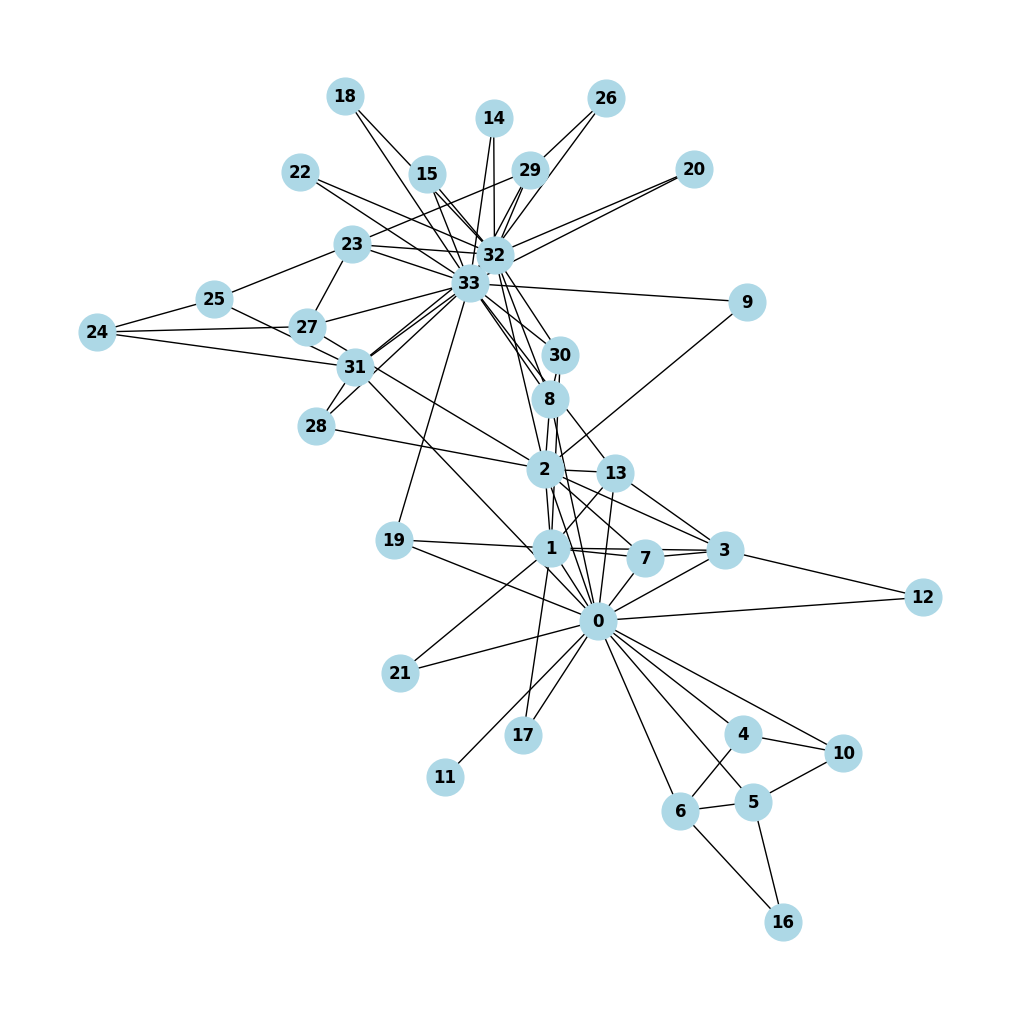

In [2]:
# Draw the graph
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, node_color='lightblue', font_weight='bold', node_size=700)
plt.show()


In [3]:
# Compute some metrics
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Display top 5 nodes based on degree centrality
sorted_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
print("Top 5 nodes by degree centrality:", sorted_degree[:5])


Top 5 nodes by degree centrality: [(33, 0.5151515151515151), (0, 0.48484848484848486), (32, 0.36363636363636365), (2, 0.30303030303030304), (1, 0.2727272727272727)]


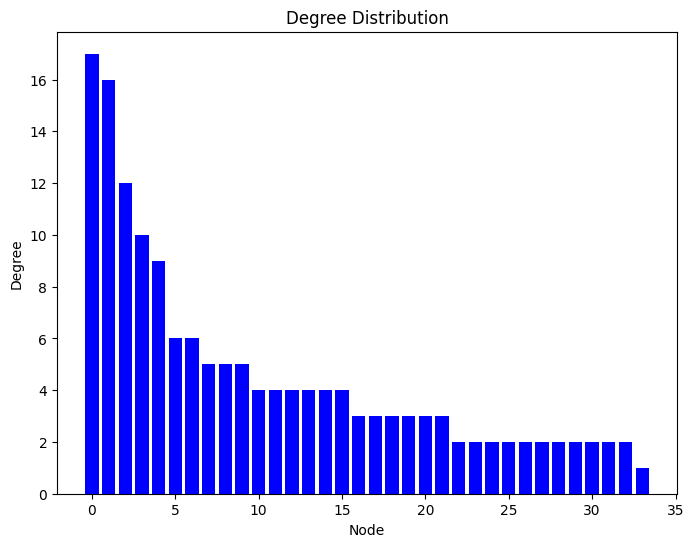

In [4]:
# Plot Degree Distribution
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
plt.figure(figsize=(8,6))
plt.bar(range(len(degree_sequence)), degree_sequence, color='blue')
plt.title("Degree Distribution")
plt.ylabel("Degree")
plt.xlabel("Node")
plt.show()


In [9]:
# Louvain method for community detection
import community as community_louvain
import matplotlib.cm as cm

# Compute the best partition (Louvain method)
partition = community_louvain.best_partition(G)

# Draw the graph with community colors
pos = nx.spring_layout(G)
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=700,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos)
plt.title("Louvain Community Detection")
plt.show()


ModuleNotFoundError: No module named 'community'

In [10]:
# Clustering coefficient
clustering_coeff = nx.clustering(G)

# Top 5 nodes by clustering coefficient
sorted_clustering = sorted(clustering_coeff.items(), key=lambda x: x[1], reverse=True)
print("Top 5 nodes by clustering coefficient:", sorted_clustering[:5])

# Average clustering coefficient of the whole network
avg_clustering = nx.average_clustering(G)
print("Average clustering coefficient of the network:", avg_clustering)


Top 5 nodes by clustering coefficient: [(7, 1.0), (12, 1.0), (14, 1.0), (15, 1.0), (16, 1.0)]
Average clustering coefficient of the network: 0.5706384782076823


In [11]:
# Shortest path between two random nodes (for example, node 0 and node 33)
shortest_path = nx.shortest_path(G, source=0, target=33)
print("Shortest path between node 0 and 33:", shortest_path)

# Length of the shortest path
path_length = nx.shortest_path_length(G, source=0, target=33)
print("Length of the shortest path:", path_length)


Shortest path between node 0 and 33: [0, 8, 33]
Length of the shortest path: 2


In [12]:
# PageRank centrality
pagerank = nx.pagerank(G)

# Top 5 nodes by PageRank
sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)
print("Top 5 nodes by PageRank:", sorted_pagerank[:5])


Top 5 nodes by PageRank: [(33, 0.09698041880501741), (0, 0.08850807396280014), (32, 0.07592643687005646), (2, 0.06276686454603017), (1, 0.05741484049711006)]


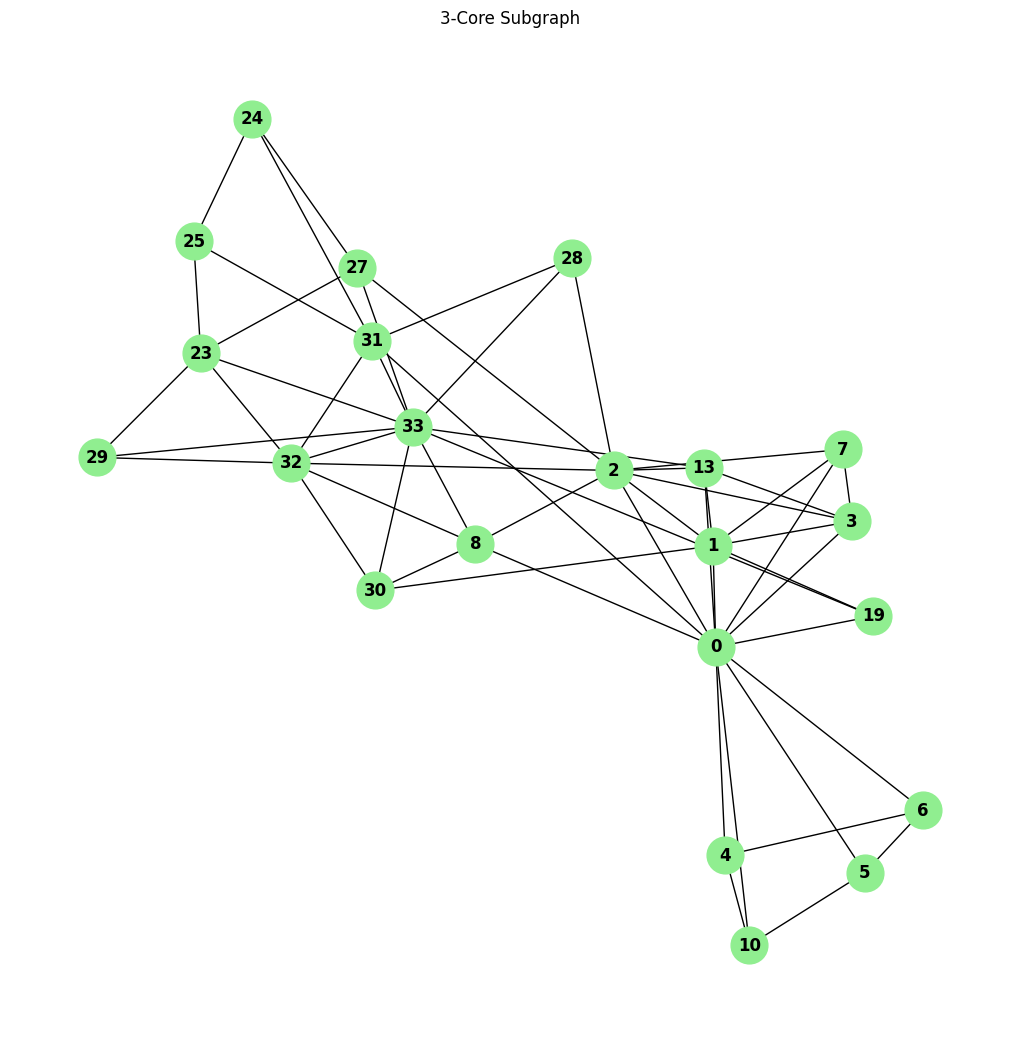

Number of nodes in the 3-core subgraph: 22


In [13]:
# K-core decomposition
k_core = nx.k_core(G, k=3)

# Draw the k-core subgraph
plt.figure(figsize=(10, 10))
nx.draw(k_core, with_labels=True, node_color='lightgreen', font_weight='bold', node_size=700)
plt.title("3-Core Subgraph")
plt.show()

# Number of nodes in the k-core subgraph
print("Number of nodes in the 3-core subgraph:", k_core.number_of_nodes())


In [14]:
# Degree assortativity
degree_assortativity = nx.degree_assortativity_coefficient(G)
print("Degree assortativity coefficient:", degree_assortativity)


Degree assortativity coefficient: -0.47561309768461413


In [15]:
# Network diameter (longest shortest path)
try:
    diameter = nx.diameter(G)
    print("Network diameter:", diameter)
except nx.NetworkXError as e:
    print("Network diameter not defined:", e)

# Average shortest path length
avg_shortest_path = nx.average_shortest_path_length(G)
print("Average shortest path length:", avg_shortest_path)


Network diameter: 5
Average shortest path length: 2.408199643493761


In [16]:
# Betweenness centrality
betweenness = nx.betweenness_centrality(G)

# Top 5 nodes by betweenness centrality
sorted_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)
print("Top 5 nodes by betweenness centrality:", sorted_betweenness[:5])


Top 5 nodes by betweenness centrality: [(0, 0.43763528138528146), (33, 0.30407497594997596), (32, 0.145247113997114), (2, 0.14365680615680618), (31, 0.13827561327561325)]


In [17]:
# Eigenvector centrality
eigenvector = nx.eigenvector_centrality(G)

# Top 5 nodes by eigenvector centrality
sorted_eigenvector = sorted(eigenvector.items(), key=lambda x: x[1], reverse=True)
print("Top 5 nodes by eigenvector centrality:", sorted_eigenvector[:5])


Top 5 nodes by eigenvector centrality: [(33, 0.37337121301323506), (0, 0.35548349418519426), (2, 0.3171893899684447), (32, 0.3086510477336959), (1, 0.2659538704545024)]


In [18]:
# Graph density
density = nx.density(G)
print("Graph density:", density)


Graph density: 0.13903743315508021


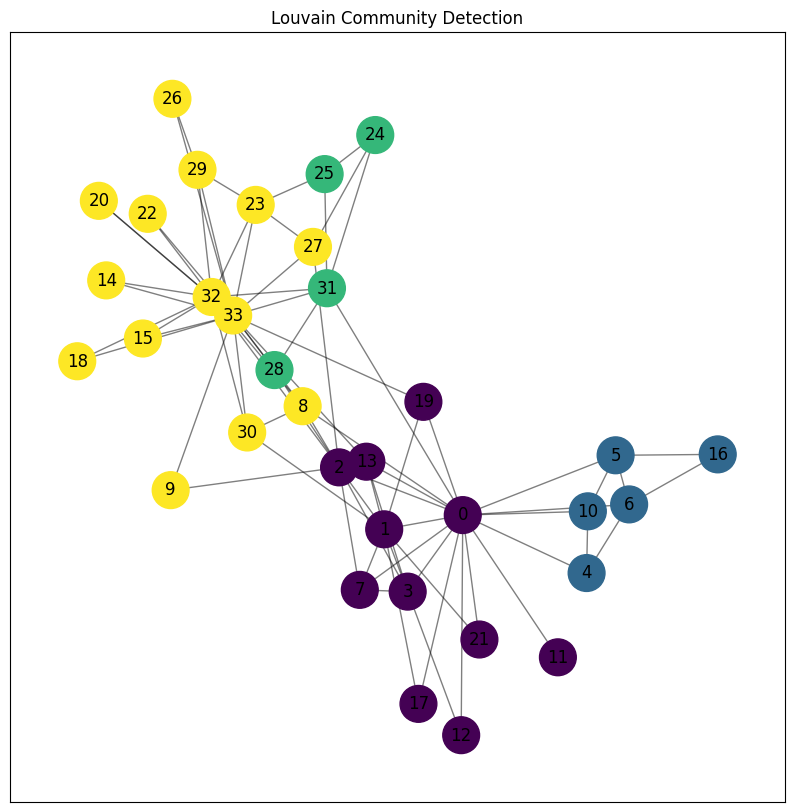

In [21]:
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# Compute the best partition (Louvain method)
partition = community_louvain.best_partition(G)

# Draw the graph with community colors
pos = nx.spring_layout(G)

# Use the colormap directly from matplotlib
cmap = plt.get_cmap('viridis')

plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=700,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos)
plt.title("Louvain Community Detection")
plt.show()
